## TensorFlow / Keras

TensorFlow와 Keras는 ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈 소스 라이브러리 입니다.

TensorFlow와 Keras 모두 2015년에 배포되었습니다.

Keras는 사용자가 TensorFlow를 좀 더 쉽고 편하게 사용할 수 있도록 해주는 high level API를 제공합니다.

TensorFlow 2.x에서는 Keras를 딥러닝의 공식 API로 채택하였고, TensorFlow안의 하나의 모듈로 자리 잡았습니다.


In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [10]:
model.fit(x_train,y_train,epochs=10)
model.evaluate(x_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2962 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1433 - accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1054 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0875 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9813
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9830
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0464 - accuracy: 0.9850
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0671 

[0.06712448596954346, 0.9819999933242798]

In [11]:
idx = np.random.randint(len(x_train))
image= x_train[idx]

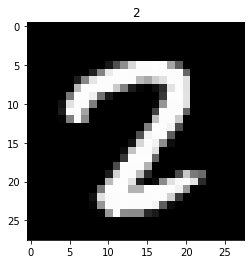

In [12]:
plt.imshow(image,cmap="gray")
plt.title(y_train[idx])
plt.show()

# 내 손글씨로 검출해보기

In [13]:
import os 
from PIL import Image

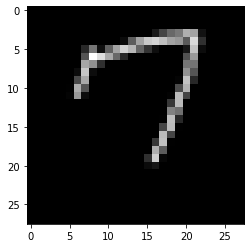

In [19]:
image_path = "C:\\Users\\sumin\\Desktop\\study\\Tensorflow\\seven.png"
cur_img = Image.open(image_path)
plt.imshow(cur_img)
cur_img = cur_img.resize((28,28))
image = np.asarray(cur_img)
try:
    image = np.mean(image,axis=2)
except:
    pass

image = np.abs(255-image)
image = image.astype(np.float32)/255.

plt.imshow(image,cmap="gray")
plt.show()

In [21]:
image = np.reshape(image, (1,28,28))
print(model.predict(image))

print(f"Model이 예측한 값은 {np.argmax(model.predict(image),-1)} 입니다.")

[[1.09936846e-04 2.07803780e-04 5.48610166e-02 2.35221516e-02
  5.06067229e-03 8.58854223e-03 4.04343627e-05 8.93390894e-01
  1.10516371e-02 3.16695427e-03]]
Model이 예측한 값은 [7] 입니다.
